In [1]:
import sys
sys.path.insert(0, '..\\..\\frxas.py')

import numpy as np
import h5py
import matplotlib.pyplot as plt
import lmfit
from lmfit import Parameters, minimize, report_fit

from frxas import hdf5_io
from frxas import models
from frxas import visualization

%reload_ext autoreload
%autoreload 2
# %matplotlib inline

In [2]:
def chi_pattern(x, amp, gamma, ld, tg, yd, f, L):
    r"""Summarize the function in one line.

    Function for dimensionless vacancy concentrations assuming ideal behavior
    and overpotential control.

    Parameters
    ----------
    x : list or np.ndarray
        Array or list of arrays of length values.
    ld : float
        :math:`l_{\delta}` : Characteristic length scale of vacancy profile,
        often called the "utilization length".
    tg : float
        :math:`t_G`  : Characteristic time scale of vacancy profile. Reflects
        time scale of switching from kinetic limitations (low frequency) to
        co-limitation by kinetics and diffusion (moderate to high frequency).
    aoo : float
        :math:`A_o` : Thermodynamic factor.
    kappa : float
        Bleh bleah
    f : float
        Applied linear frequency in units of Hz.

    Returns
    -------
    np.ndarray
        Evaluated function for given length array and parameters.
    """
    g =gamma
    w = 2 * np.pi * f
#     ao = models.calc_ao(aoo, po2, po2_ref)

    chi = -amp /(L * (1 / L +  g / ld * np.sqrt(1 + 1j * tg * w))) \
    * np.exp(-(x + yd)/ ld * np.sqrt(1 + 1j * tg * w))

    return chi

In [99]:
f1 = hdf5_io.get_all_datasets('July18_frXAS', start_indices = [[4, 0, 2, 3], [6, 0, 8, 0], [1, 0, 3]])
hdf5_io.close_frxas_file('July18_frXAS')

In [100]:
x, data, frequencies, gases, sizes = hdf5_io.unpack_data(f1, kind='data_adj')

In [101]:
colors = ['k', 'r', 'b', 'c']
markers = [(6, 2, 0), 's', '^', 'o']

colors = colors * (len(colors) % len(data))
markers = markers * (len(colors) % len(data))

In [102]:
x = x[8:]
data = data[8:]
frequencies = frequencies[8:]

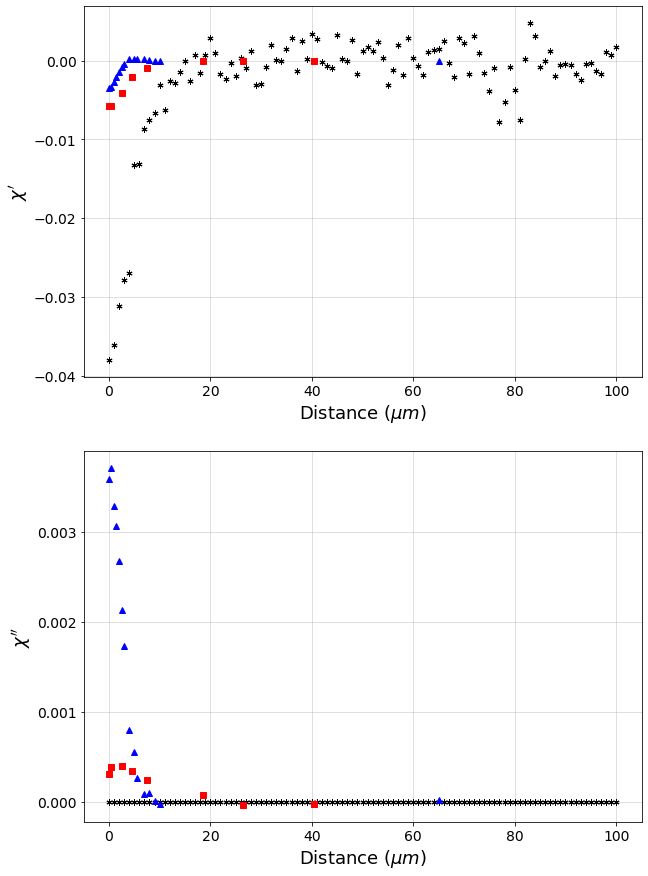

In [104]:
fig, axes = plt.subplots(nrows=2, figsize=(10,15))

for iy in np.arange(0,3):
    visualization.plot_chi(axes, x[iy], data[iy], color=colors[iy], marker=markers[iy], ls='')

plt.show()

In [114]:
fit_params = Parameters()

for iy, y in enumerate(data):
    fit_params.add('amp_%i' % (iy+1), value=.03, min=0, max=1)
    fit_params.add('gamma_%i' % (iy+1), value=10, min=1e-9, max=50)
    fit_params.add('ld_%i' % (iy+1), value=5, min=1e-9, max=50)
    fit_params.add('tg_%i' % (iy+1), value=.1, min=1e-9, max=10.0)
    fit_params.add('yd_%i' % (iy+1), value=0, min=-5, max=5, vary=False)
    fit_params.add('f_%i' % (iy+1), value=frequencies[iy], vary=False)
    fit_params.add('L_%i' % (iy+1), value=6.5e-1, vary=False)


# Setting other parameters within each dataset to be equal
for iy in np.arange(1, 3):
    fit_params['gamma_%i' % (iy+1)].expr = 'gamma_1'
    fit_params['ld_%i' % (iy+1)].expr = 'ld_1'
    fit_params['tg_%i' % (iy+1)].expr = 'tg_1'

In [115]:
mini=lmfit.Minimizer(models.objective_fun, fit_params, fcn_args=(x, data, chi_pattern))

In [116]:
out = mini.minimize(method='least_squares')
# out = mini.minimize(method='least_squares', params=out.params)
print('\u03A7_red = ', out.redchi)
report_fit(out.params)

Χ_red =  2.3928780192731075e-06
[[Variables]]
    amp_1:    0.31599310 +/- 1.56852617 (496.38%) (init = 0.03)
    gamma_1:  49.9999995 +/- 287.007683 (574.02%) (init = 10)
    ld_1:     5.10553156 +/- 0.21009909 (4.12%) (init = 5)
    tg_1:     0.09187222 +/- 0.05571248 (60.64%) (init = 0.1)
    yd_1:     0 (fixed)
    f_1:      0 (fixed)
    L_1:      0.65 (fixed)
    amp_2:    0.04510801 +/- 0.22408157 (496.77%) (init = 0.03)
    gamma_2:  49.9999995 +/- 287.007683 (574.02%) == 'gamma_1'
    ld_2:     5.10553156 +/- 0.21009909 (4.12%) == 'ld_1'
    tg_2:     0.09187222 +/- 0.05571248 (60.64%) == 'tg_1'
    yd_2:     0 (fixed)
    f_2:      0.5 (fixed)
    L_2:      0.65 (fixed)
    amp_3:    0.07861503 +/- 0.40554497 (515.86%) (init = 0.03)
    gamma_3:  49.9999995 +/- 287.007683 (574.02%) == 'gamma_1'
    ld_3:     5.10553156 +/- 0.21009909 (4.12%) == 'ld_1'
    tg_3:     0.09187222 +/- 0.05571248 (60.64%) == 'tg_1'
    yd_3:     0 (fixed)
    f_3:      8 (fixed)
    L_3:      0.65 

In [47]:
out.params.pretty_print()

Name         Value      Min      Max   Stderr     Vary     Expr Brute_Step
L_1           0.65     -inf      inf        0    False     None     None
L_10          0.65     -inf      inf        0    False     None     None
L_11          0.65     -inf      inf        0    False     None     None
L_2           0.65     -inf      inf        0    False     None     None
L_3           0.65     -inf      inf        0    False     None     None
L_4           0.65     -inf      inf        0    False     None     None
L_5           0.65     -inf      inf        0    False     None     None
L_6           0.65     -inf      inf        0    False     None     None
L_7           0.65     -inf      inf        0    False     None     None
L_8           0.65     -inf      inf        0    False     None     None
L_9           0.65     -inf      inf        0    False     None     None
amp_1      0.08771        0        1 0.002065     True     None     None
amp_10     0.03092        0        1   0.1237    

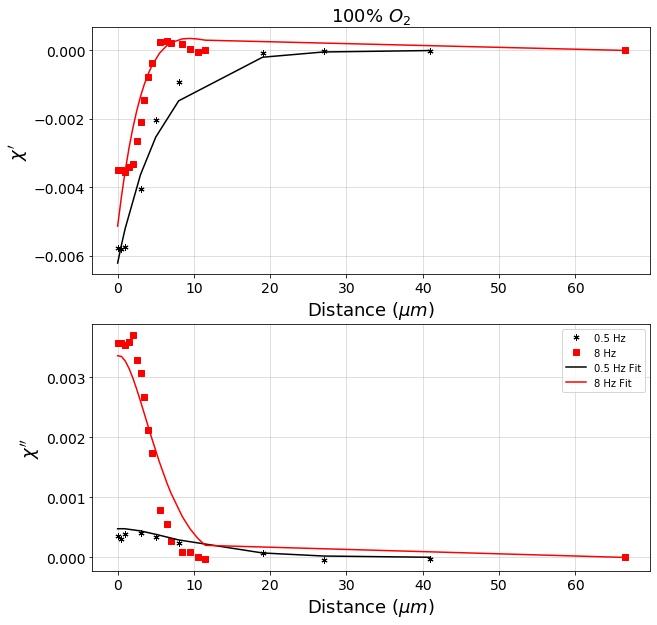

In [82]:
fig, axes = plt.subplots(nrows=2, figsize=(10,10))

for iy in np.arange(0,2):
    visualization.plot_chi(axes, x[iy], data[iy], color=colors[iy],
                           marker=markers[iy], ls='', 
                           label=str(frequencies[iy]) + ' Hz')
for iy in np.arange(0,2):
    visualization.plot_chi(axes, x[iy], models.dataset_fun(out.params, iy, x[iy], chi_pattern),
                           color=colors[iy], marker='',
                           label=str(frequencies[iy]) + ' Hz Fit')
    
axes[0].set_title('100% $O_2$', fontsize=18)
plt.legend()
# plt.show()
# plt.savefig(r'Plots\Pattern Amp Model wo yd\100%O2.png', dpi=300, bbox_inches='tight')